# Week 3: Slope fields and other graphical analysis

<hr/>

In [5]:
# import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# for pretty plots
import seaborn as sns
sns.set()

## Plotting $\dot x$ vs. $x$

We've gotten quite a bit of practice graphing our differential equations by hand so far, but it would be better to have a way to do this programmatically. Specifically, we might want to plot $\dot x$ vs. $x$ when our linear stability analysis has failed us, and we can't determine the stability of a fixed point from the second derivative. 

Below, let's consider $\dot x = x^2(6-x)$. We'll want to plot $\dot x$ over a relevant range of $x$ values, in this case spanning at least 0 and 6, so we can see the behavior at the two fixed points. 

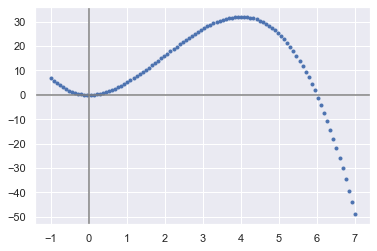

In [6]:
# specify x values
x = np.linspace(-1, 7, 100)

# compute corresponding x_dot
x_dot = x**2 * (6-x)

# plot
plt.plot(x, x_dot, '.')

# add axes at y=0, x=0 as a visual aid 
plt.axhline(y=0, color="gray")
plt.axvline(x=0, color="gray")

## Plotting slope fields

Yet another way to visualize how a differential equation system might proceed over time is with a *slope field*. A slope field is plotted as $x$ vs. $t$, where at each value, a small line is plotted to indicate the value of $\dot x$. The slope of this line indicates the direction the system will proceed in when at that particular value of $x$ and $t$. By repeatedly following these slopes, we can begin to see the direction the system will head in over time. You can think of it as "Euler by eye," where we get periodic estimates of the slope, and can use them to guide us to stable fixed point values. 

Below I include the code for how to make the slope field for $\dot x = x^2(6-x)$. The approach is a little convoluted, and beyond what I expect you to know for this course. However, you can easily repurpose this code for any other differential equation function by just changing the `x` values you want to plot over, and updating the `x_dot` function.

Text(0, 0.5, 'x')

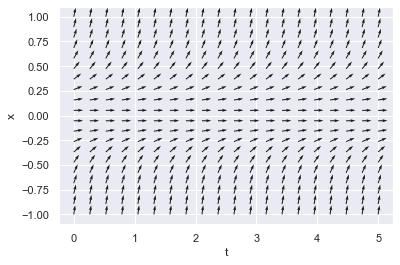

In [7]:
# specify range of t and x values to plot over
# last number is the number of arrows that will be plotted per side
t = np.linspace(0,5,20)
x = np.linspace(-1,1,20)

# set up 'grid' of (t,x) values for plot
T, X = np.meshgrid(t, x)

# define the x_dot function
def x_dot(t,x):
    return x**2 * (6-x)

# compute x_dot for our grid of (t,x) values
dXdT = x_dot(T,X)

# nomalize the lengths of the arrows, for cleaner plotting
U = (1 / (1 + dXdT**2)**.5)*np.ones(T.shape)
V = (1 / (1 + dXdT**2)**.5)*dXdT

# plot the U, V arrows on the T, X grid
plt.quiver(T, X, U, V)
plt.xlabel('t')
plt.ylabel('x')

From this plot, we can see the semi-stable nature of the fixed point at $x=0$: values below 0 flow towards the fixed point, while values above zero flow away. 